<a href="https://colab.research.google.com/github/Dhrupad-05/Intro-to-Machine-Learning/blob/main/3_Feature_Scaling(or_Transformations_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head(7)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0


In [57]:
df=df.iloc[:,2:]

In [58]:
df.sample(7)

,Age,EstimatedSalary,Purchased
90,22,81000,0
256,41,72000,0
72,20,23000,0
360,43,129000,1
94,29,83000,0
73,33,113000,0
77,22,27000,0


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape


((280, 2), (120, 2))

# **Standard Scaler**

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#fit->this scaler will learn from paramters
scaler.fit(X_train)
#transform
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#showing the values
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [61]:
#as it return in the form of np array so we convert it ot our convinience
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [62]:
np.round(X_train_scaled.describe(), 1)


,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


**Effects of Scaling**

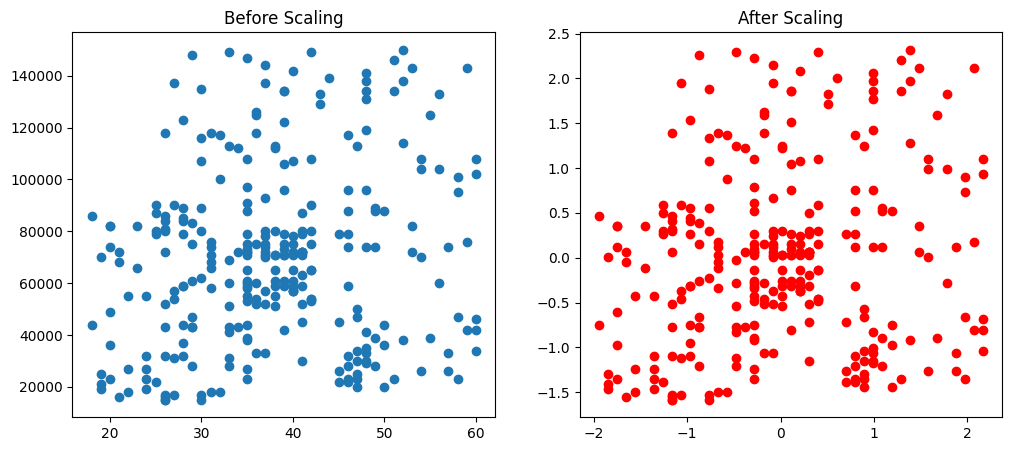

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

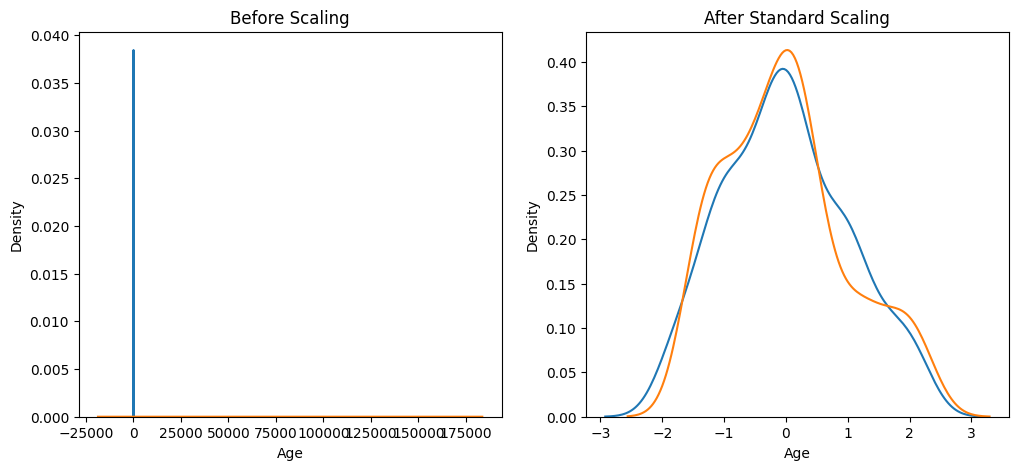

In [64]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# **Normalisation**

**Min_Max Scaler**

In [65]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


np.round(X_train.describe(), 1)


,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


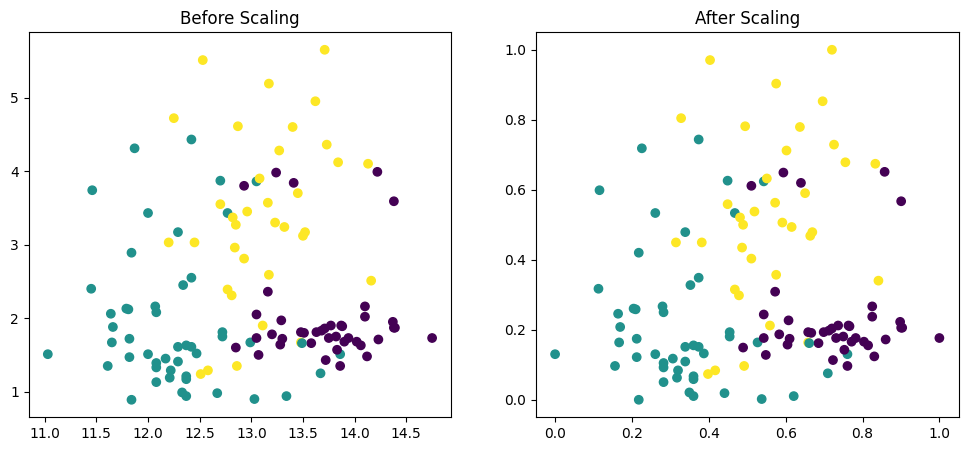

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
#the data points remain the same (only scale changes)
ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

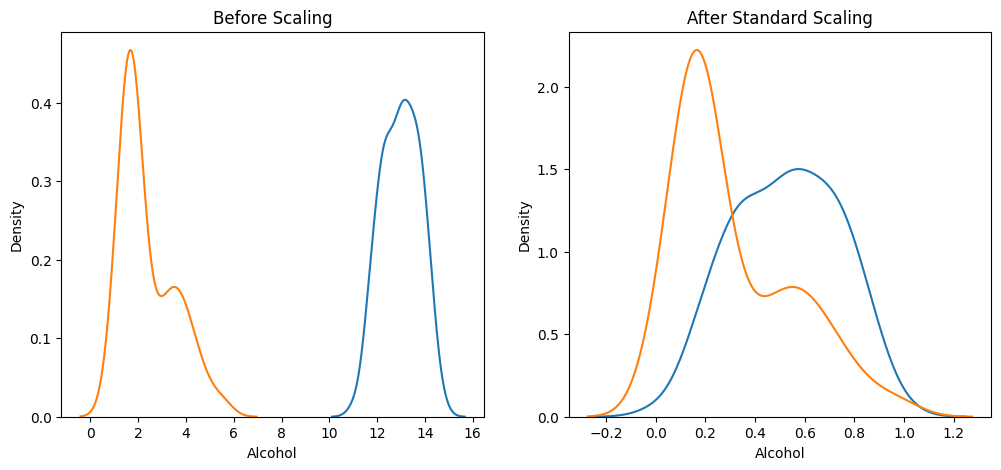

In [70]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

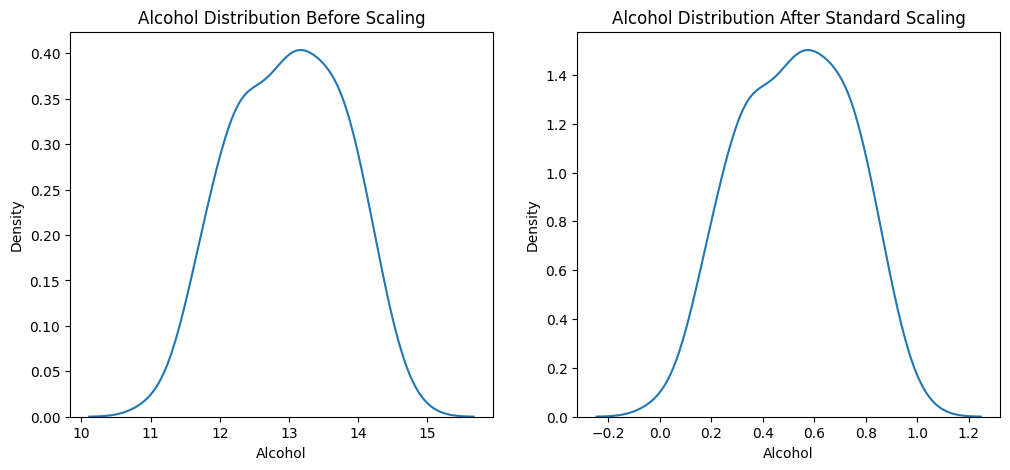

In [71]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

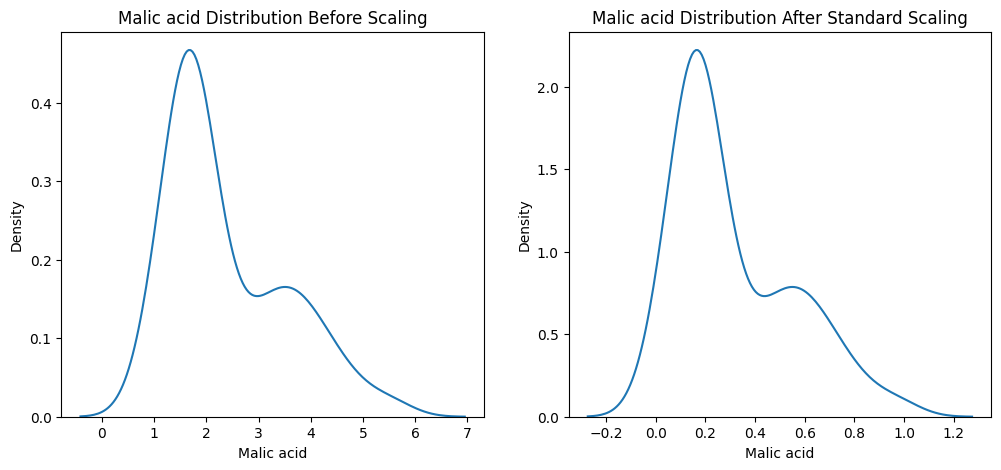

In [72]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

# **Encoding**

**Encoding Catagorical Data**

In [73]:
df=pd.read_csv('customer.csv')
df.head()


,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [74]:
df=df.iloc[:,2:]
df.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:2],df.iloc[:,-1],test_size=0.2)

In [76]:
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])
oe

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:2],df.iloc[:,-1],test_size=0.2)

oe.fit(X_train)
X_train=oe.transform(X_train)
X_test=oe.transform(X_test)

In [78]:
oe.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

**LabelEncoder**

In [79]:
#Use it in output cases(not in input-> check sklearn documentation for furthur details)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [80]:
le.fit(y_train)
y_train=le.transform(y_train)

#classes
le.classes_

array(['No', 'Yes'], dtype=object)

**One Hot Encoding**

In [81]:
#convert into vectors
#no of different section-> no of different dimensions for the vector
#Dummy Variable Trap-> this is the situation when there are n number of columns
#and we turn it into vector. we usually turn (n-1) nunmber of columns to avoid it

In [82]:
df=pd.read_csv('cars.csv')
df.sample(7)

,brand,km_driven,fuel,owner,selling_price
2059,Tata,189000,Diesel,First Owner,260000
414,Toyota,68089,Petrol,First Owner,2000000
1365,Honda,8576,Petrol,First Owner,680000
6522,Chevrolet,120000,Diesel,First Owner,370000
7779,Maruti,15000,Petrol,First Owner,282000
4954,Toyota,218000,Diesel,Second Owner,215000
6830,Ford,112000,Diesel,Second Owner,190000


In [83]:
df['brand'].value_counts()
#As there are columns with lot of values and some with very little values... now we merge the columns with little values

,count
brand,
Maruti,2448
Hyundai,1415
Mahindra,772
Tata,734
Toyota,488
Honda,467
Ford,397
Chevrolet,230
Renault,228


One Hot Encoding using Pandas

In [84]:
pd.get_dummies(df,columns=['fuel','owner'])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,False,True,False,False,True,False,False,False,False
1,Skoda,120000,370000,False,True,False,False,False,False,True,False,False
2,Honda,140000,158000,False,False,False,True,False,False,False,False,True
3,Hyundai,127000,225000,False,True,False,False,True,False,False,False,False
4,Maruti,120000,130000,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,False,True,True,False,False,False,False
8124,Hyundai,119000,135000,False,True,False,False,False,True,False,False,False
8125,Maruti,120000,382000,False,True,False,False,True,False,False,False,False
8126,Tata,25000,290000,False,True,False,False,True,False,False,False,False


K-1 One Hot Encoding

In [85]:
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False
2,Honda,140000,158000,False,False,True,False,False,False,True
3,Hyundai,127000,225000,True,False,False,False,False,False,False
4,Maruti,120000,130000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,True,False,False,False,False
8124,Hyundai,119000,135000,True,False,False,True,False,False,False
8125,Maruti,120000,382000,True,False,False,False,False,False,False
8126,Tata,25000,290000,True,False,False,False,False,False,False


Using SKlearn

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=2)

In [87]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [88]:
X_train_new = ohe.fit_transform(X_train[['fuel','owner']])
X_test_new = ohe.transform(X_test[['fuel','owner']]).toarray()

X_train_new.shape

(6502, 9)

In [89]:
X_train[['brand','km_driven']].values

array([['Hyundai', 35000],
       ['Jeep', 60000],
       ['Hyundai', 25000],
       ...,
       ['Tata', 15000],
       ['Maruti', 32500],
       ['Isuzu', 121000]], dtype=object)

In [90]:
np.hstack((X_train[['brand','km_driven']].values,X_train_new.toarray()))

array([['Hyundai', 35000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Jeep', 60000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Hyundai', 25000, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       ['Tata', 15000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Maruti', 32500, 0.0, ..., 1.0, 0.0, 0.0],
       ['Isuzu', 121000, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

OneHotEncoding with Top Categories

In [91]:
counts = df['brand'].value_counts()

In [92]:
df['brand'].nunique()
threshold = 100

In [93]:
replace=counts[counts <= threshold].index
pd.get_dummies(df['brand'].replace(replace, 'uncommon'))

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
0,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,True,False,False,False,False,False,False,False,False
8124,False,False,False,False,True,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,True,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,True,False,False,False


# **Column Transformer**

In [94]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [95]:
df = pd.read_csv('covid_toy.csv')
df.head(10)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
5,84,Female,NaN,Mild,Bangalore,Yes
6,14,Male,101.0,Strong,Bangalore,No
7,20,Female,NaN,Strong,Mumbai,Yes
8,19,Female,100.0,Strong,Bangalore,No
9,64,Female,101.0,Mild,Delhi,No


In [96]:
df.isnull().sum()

,0
age,0
gender,0
fever,10
cough,0
city,0
has_covid,0


In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['has_covid']),df['has_covid'],
                                                test_size=0.2)

**without using column transformer**

In [98]:
# adding simple imputer to fever col
si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])

# also the test data
X_test_fever = si.fit_transform(X_test[['fever']])

X_train_fever.shape

(80, 1)

In [99]:
# Ordinalencoding -> cough
oe = OrdinalEncoder(categories=[['Mild','Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])

# also the test data
X_test_cough = oe.fit_transform(X_test[['cough']])

X_train_cough.shape

(80, 1)

In [100]:
# OneHotEncoding -> gender,city
ohe = OneHotEncoder(drop='first',sparse_output=False)
X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])

# also the test data
X_test_gender_city = ohe.fit_transform(X_test[['gender','city']])

X_train_gender_city.shape

(80, 4)

In [101]:
# Extracting Age
X_train_age = X_train.drop(columns=['gender','fever','cough','city']).values

# also the test data
X_test_age = X_test.drop(columns=['gender','fever','cough','city']).values

X_train_age.shape

(80, 1)

In [102]:
X_train_transformed = np.concatenate((X_train_age,X_train_fever,X_train_gender_city,X_train_cough),axis=1)
# also the test data
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city,X_test_cough),axis=1)

X_train_transformed.shape

(80, 7)

**Using Column Transformer**

In [103]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse_output=False,drop='first'),['gender','city'])
],remainder='passthrough')

In [104]:
transformer.fit_transform(X_train).shape

(80, 7)

In [105]:
transformer.transform(X_test).shape

(20, 7)

# **Funtion Transform**

In [107]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [114]:
df.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [108]:
df = pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])

In [109]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [110]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipython-input-166/694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [118]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

/tmp/ipython-input-166/2937476899.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


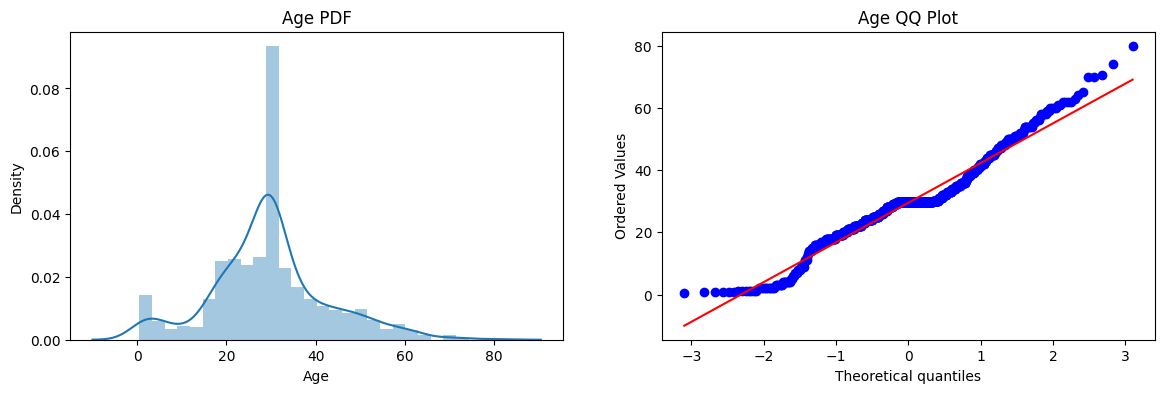

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

/tmp/ipython-input-166/2981780686.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


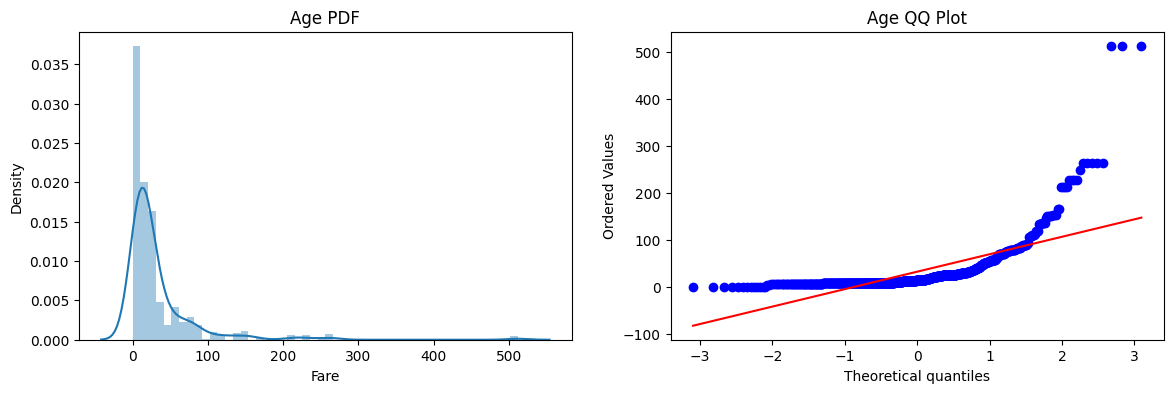

In [120]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [122]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [123]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.664804469273743


In [124]:
trf = FunctionTransformer(func=np.log1p)

In [125]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [127]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6927374301675978


In [128]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6621847690387017


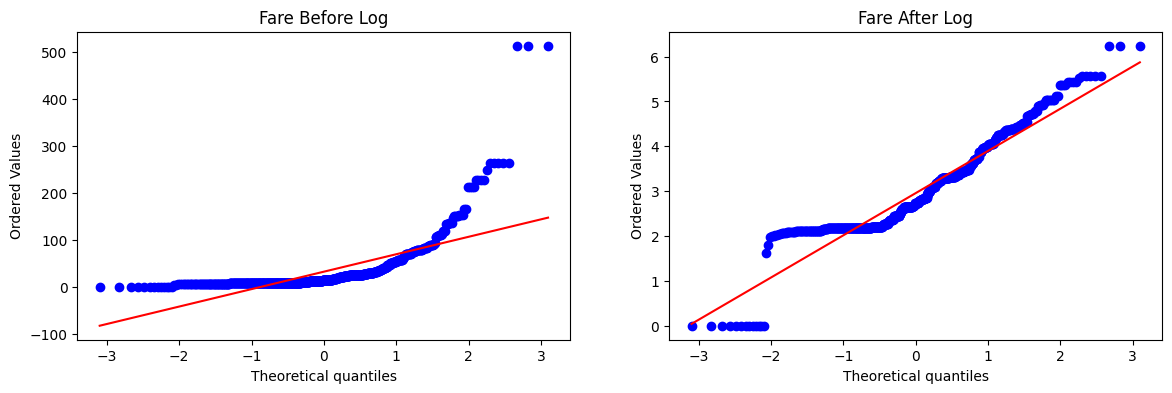

In [129]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

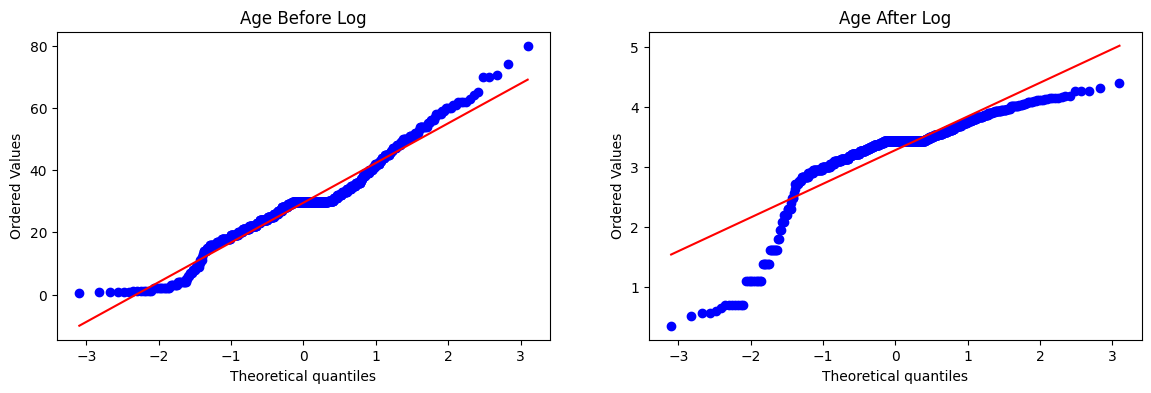

In [131]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [133]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [134]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.659217877094972


In [135]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6655680399500624


In [138]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()


Accuracy 0.6195131086142323


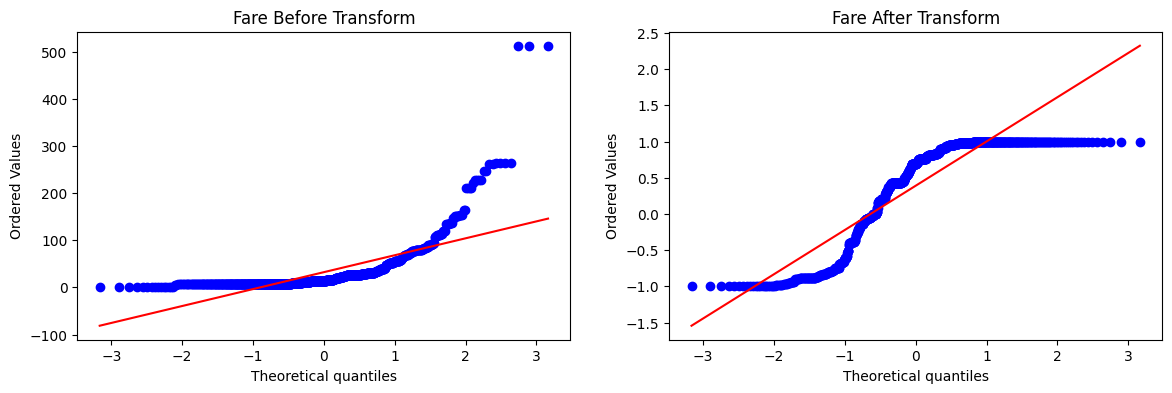

In [139]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

apply_transform(np.sin)

# **Power Transformer**

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [144]:
df = pd.read_csv('concrete_data.csv')

In [145]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [146]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [148]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [155]:
# Applying Regression without any transformation
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.627553179231485

In [156]:
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

np.float64(0.46099404916628606)

/tmp/ipython-input-166/1268627929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


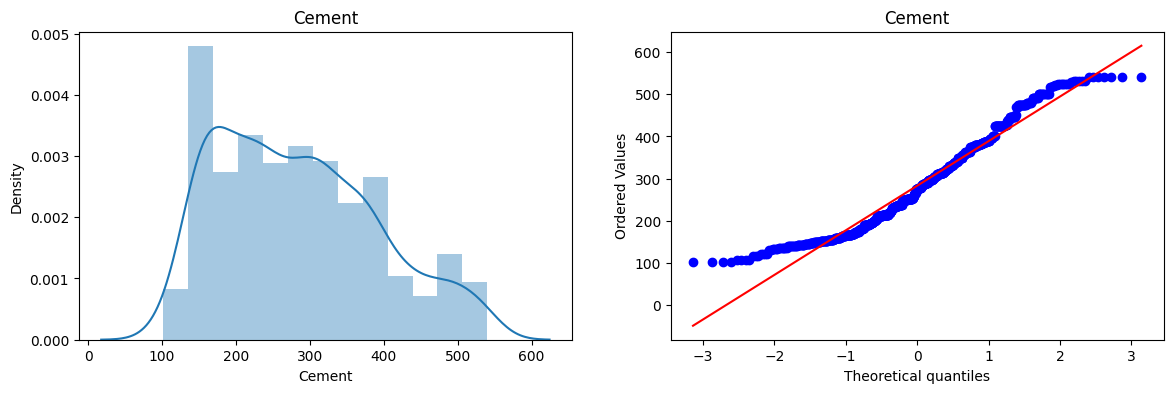

/tmp/ipython-input-166/1268627929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


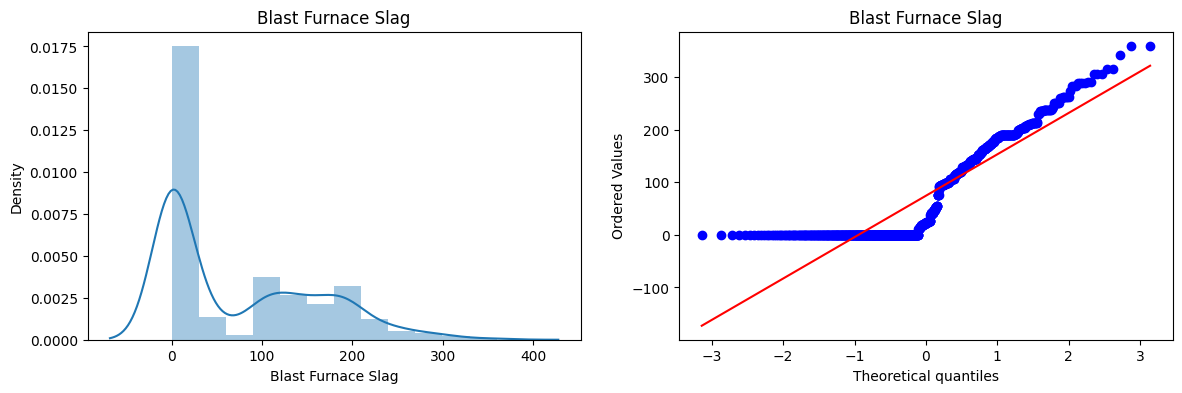

/tmp/ipython-input-166/1268627929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


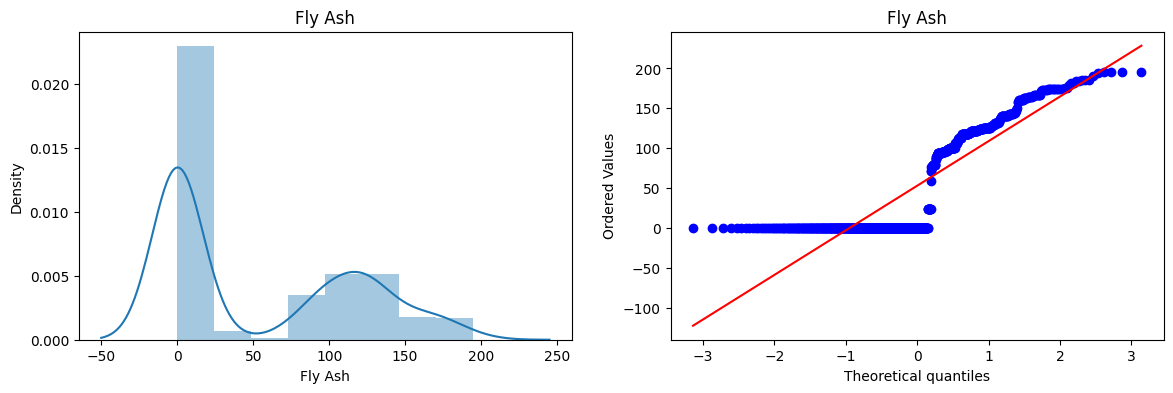

/tmp/ipython-input-166/1268627929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


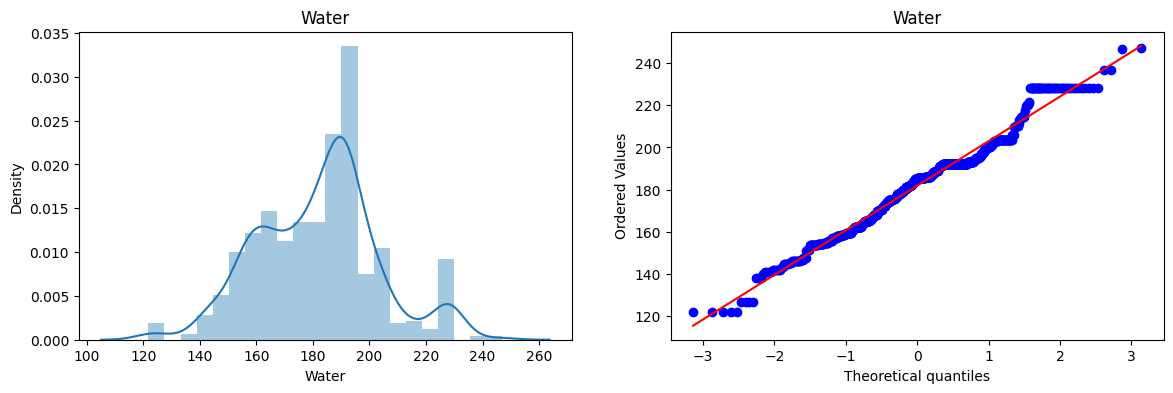

/tmp/ipython-input-166/1268627929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


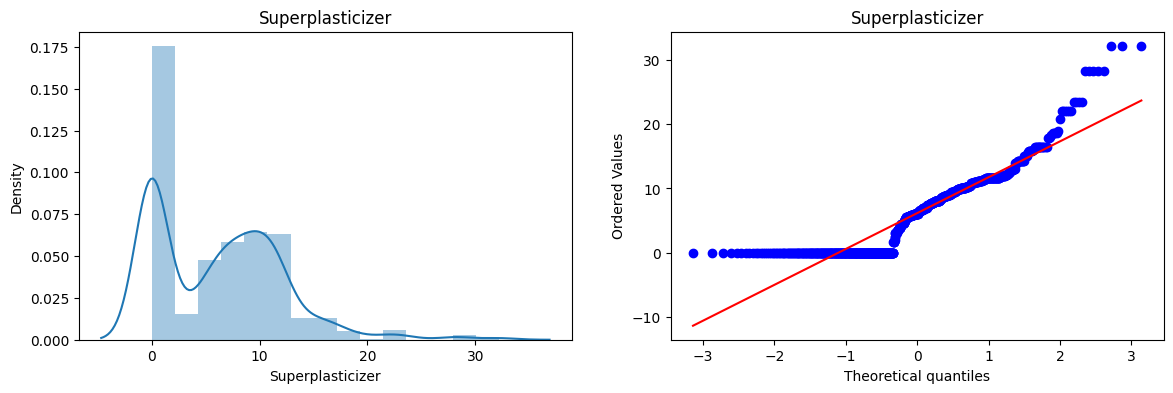

/tmp/ipython-input-166/1268627929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


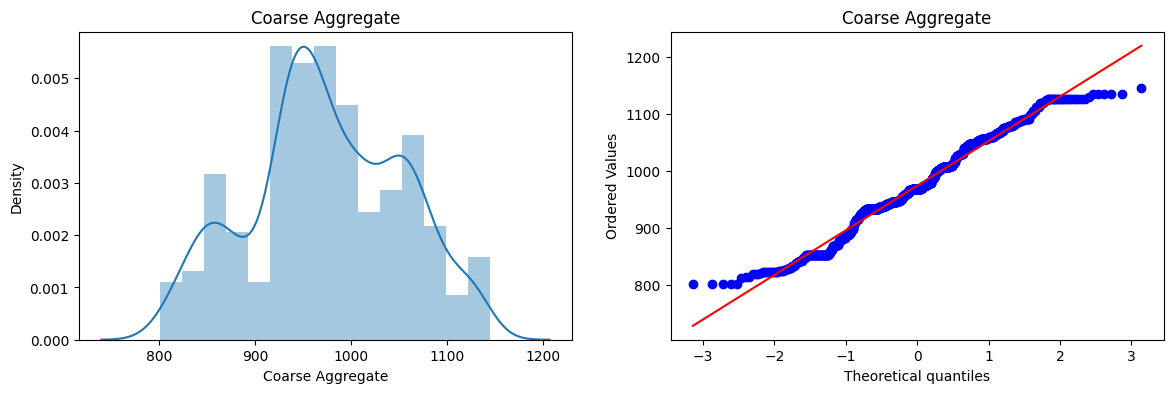

/tmp/ipython-input-166/1268627929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


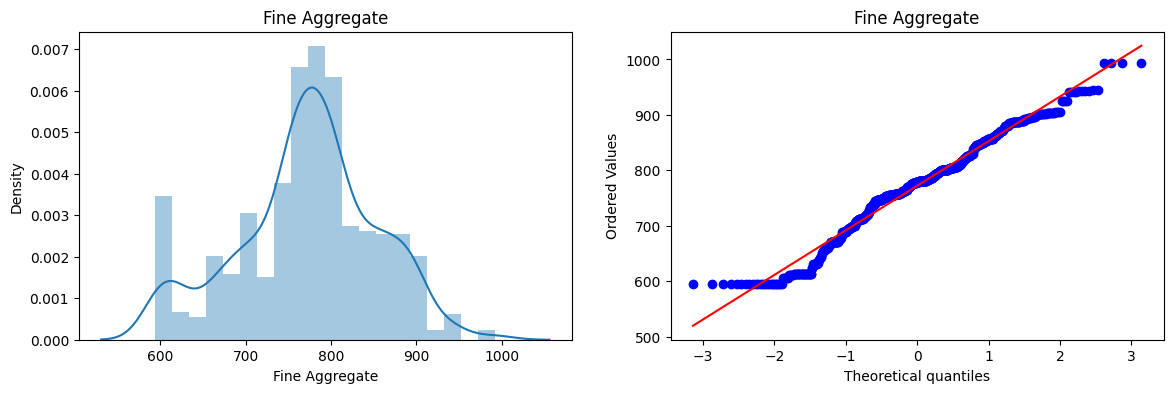

/tmp/ipython-input-166/1268627929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


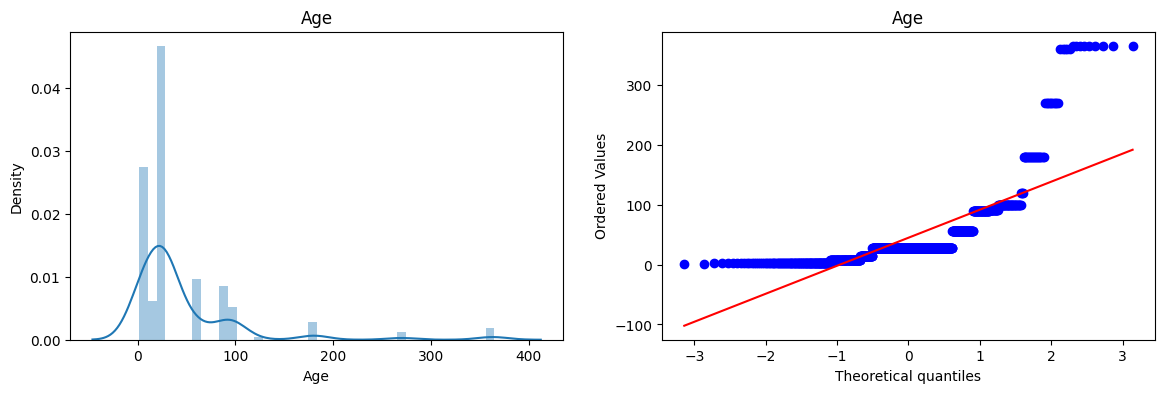

In [158]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()